
# Global Solution - Energy Now


Equipe

RM: 558062 - NOME: Henrique Francisco Garcia 

RM: 554970 - NOME: Arthur Tavares Arraes 

RM: 555152 - NOME: Willian Moreira Brito Farias Pinto 





### Passo 1 - Importar as Bibliotecas
Aqui estamos importando as bibliotecas que serão utilizadas.

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import joblib

### Passo 2

Aqui vamos carregar o dataset escolhido, aproveitando para ver um pouco sobre seus dados.

E fazendo um pequeno tratamento para que ele seja separado por colunas e linhas.

In [2]:
file_path = 'energialimpabrasil.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=',')
dataset.head()

,Regiao,Consumo,Tipo_Energia,Investimento,Area,Incentivo_Gov,Taxa_Adocao,Tempo_Instalacao,Custo_Manutencao,Familias_Atendidas,Reducoes_CO2,Vida_Util,Dias_Sol_Ano,Velocidade_Vento
0,Sudeste,1160,Energia Eolica,34926,473,1,93,7,1777,1,345,16,346,9
1,Sul,2427,Energia Eolica,11229,68,0,22,5,1597,3,707,29,157,5
2,Centro-Oeste,3520,Energia Eolica,9632,67,0,68,5,836,1,64,27,302,14
3,Sul,401,Energia Eolica,44056,306,0,20,6,1390,12,509,20,240,2
4,Sul,4376,Energia Eolica,8596,127,1,96,9,1976,11,909,28,323,2


### Passo 3

Temos em seguida um passo importante, onde vamos ver um resumo sobre os dados

Vemos quantidade de colunas, linhas e o tipos de seus dados, e uma informação bem relevante, se existe dados vazios.

In [3]:
# Exibir informações básicas sobre o dataset como quantidade de colunas e linhas e seus tipos.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Regiao              300 non-null    object
 1   Consumo             300 non-null    int64 
 2   Tipo_Energia        300 non-null    object
 3   Investimento        300 non-null    int64 
 4   Area                300 non-null    int64 
 5   Incentivo_Gov       300 non-null    int64 
 6   Taxa_Adocao         300 non-null    int64 
 7   Tempo_Instalacao    300 non-null    int64 
 8   Custo_Manutencao    300 non-null    int64 
 9   Familias_Atendidas  300 non-null    int64 
 10  Reducoes_CO2        300 non-null    int64 
 11  Vida_Util           300 non-null    int64 
 12  Dias_Sol_Ano        300 non-null    int64 
 13  Velocidade_Vento    300 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 32.9+ KB


## Aqui podemos observar os valores dos quartis da conluna Consumo.

In [4]:
dataset["Consumo"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Consumo,300.0,2564.393333,1351.899884,104.0,1316.25,2738.0,3628.0,4969.0


### Passo 4
Agora que sabemos com o que estamos mexendo vamos fazer uma breve analise sobre o documento.

Como de inicio vamos importar seeborn e matplotlib para facilitar nossa vizualição dos dados.

Nossa análise tem como foco verifica a distribuição das energia limpas Eólica e Solar.

In [5]:
#Importação das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

### Primeira visão
Nos gráficos abaixo temos a destribução total dessas energias por região, onde já é possivel se dizer e sudeste e norte tem maior investimento na área.

Em sequência temos um gráfico de barras que nos diz que a energia solar tem maior investimento em relação a quantidade do que a eólica.

C:\Users\Henrique\AppData\Local\Temp\ipykernel_22428\3602880489.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dataset, palette="viridis", order=dataset[coluna].value_counts().index)


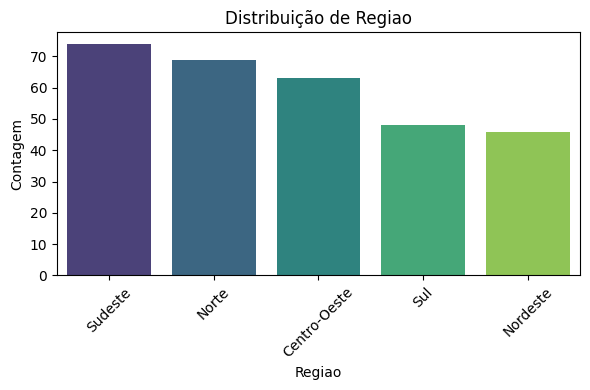

C:\Users\Henrique\AppData\Local\Temp\ipykernel_22428\3602880489.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dataset, palette="viridis", order=dataset[coluna].value_counts().index)


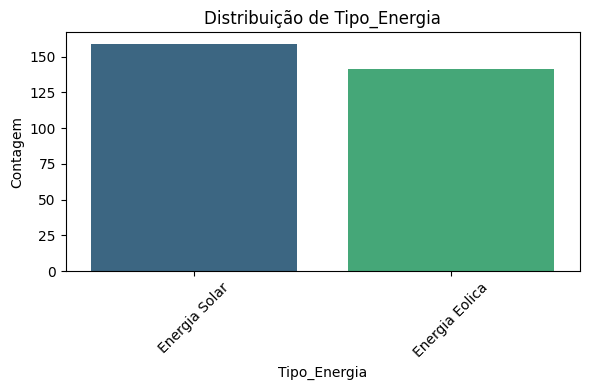

In [6]:
colunas_categoricas = dataset.select_dtypes(include=['object']).columns

# Gerar gráficos para cada coluna categórica
for coluna in colunas_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=coluna, data=dataset, palette="viridis", order=dataset[coluna].value_counts().index)
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X se necessário
    plt.tight_layout()
    plt.show()

## Gráfico de Pizza

### Afim de facilitar a visualização temos o gráfico acima de barras em pizza, facilitando ver o que foi apontado anteriormente.

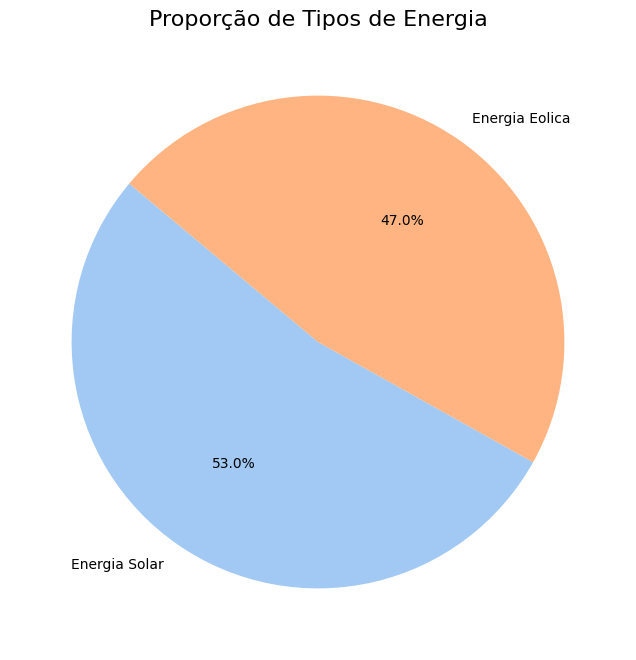

In [7]:
data_tipo_energia = dataset["Tipo_Energia"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_tipo_energia, labels=data_tipo_energia.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proporção de Tipos de Energia", fontsize=16)
plt.show()


## Adoção de Energia limpa por região

### Aqui temos uma visão interessante esse gráfico boxplot, podemos ver a distribução dos quartis.

### Podemos ver que mesmo Sudeste com maior investimento não representa os maiores outliers, tendo, Norte, Nordeste e Centro-Oeste

C:\Users\Henrique\AppData\Local\Temp\ipykernel_22428\1623866063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Regiao", y="Taxa_Adocao", palette="Set2")


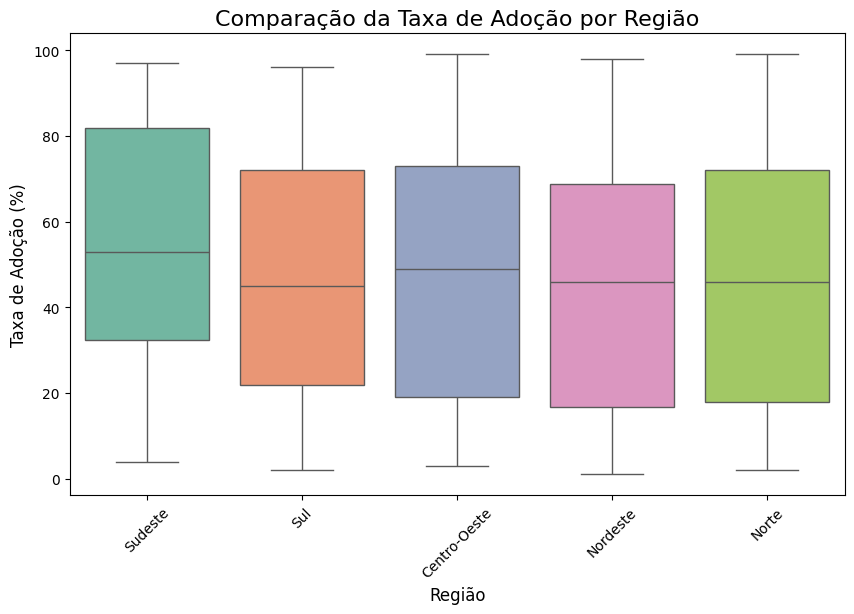

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x="Regiao", y="Taxa_Adocao", palette="Set2")
plt.title("Comparação da Taxa de Adoção por Região", fontsize=16)
plt.xlabel("Região", fontsize=12)
plt.ylabel("Taxa de Adoção (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Outro fator importante é a redução do CO2 com o uso das energias limpas.

### podemos ver abaixo a atual situação, uma característica é a semelhança entre o investimento e a redução como estão relacionados.

C:\Users\Henrique\AppData\Local\Temp\ipykernel_22428\3771268641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Regiao", y="Reducoes_CO2", palette="Set2")


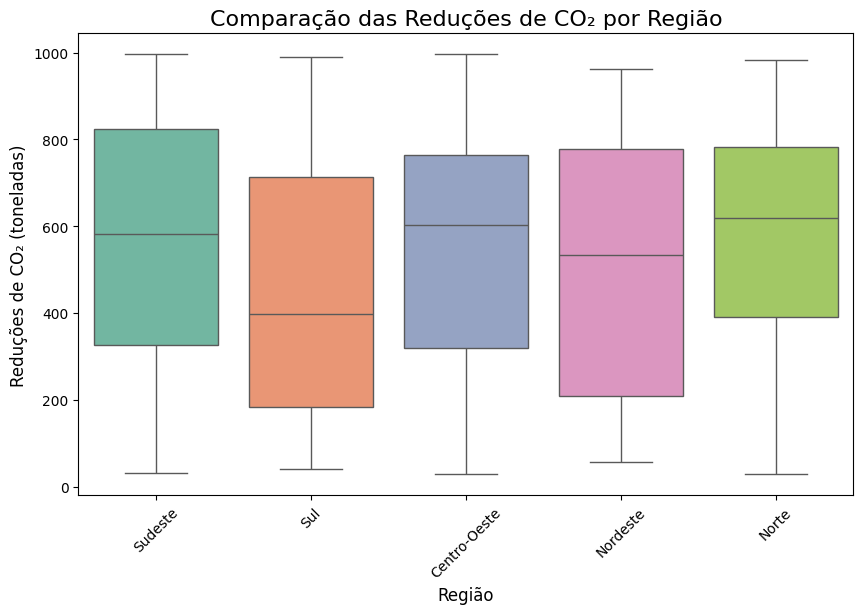

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x="Regiao", y="Reducoes_CO2", palette="Set2")
plt.title("Comparação das Reduções de CO₂ por Região", fontsize=16)
plt.xlabel("Região", fontsize=12)
plt.ylabel("Reduções de CO₂ (toneladas)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## E por quetão de curiosidade, temos o valor investido em cada energia.

### Uma coisa interessante é que mesmo tendo um investimento maior em quantidade na energia solar, o valor de energia eólica tem em reais um valor maior.
### podemos concluir que o investimento para a instalação dele seja maior.

C:\Users\Henrique\AppData\Local\Temp\ipykernel_22428\370369781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="Tipo_Energia", y="Investimento", palette="Set3")


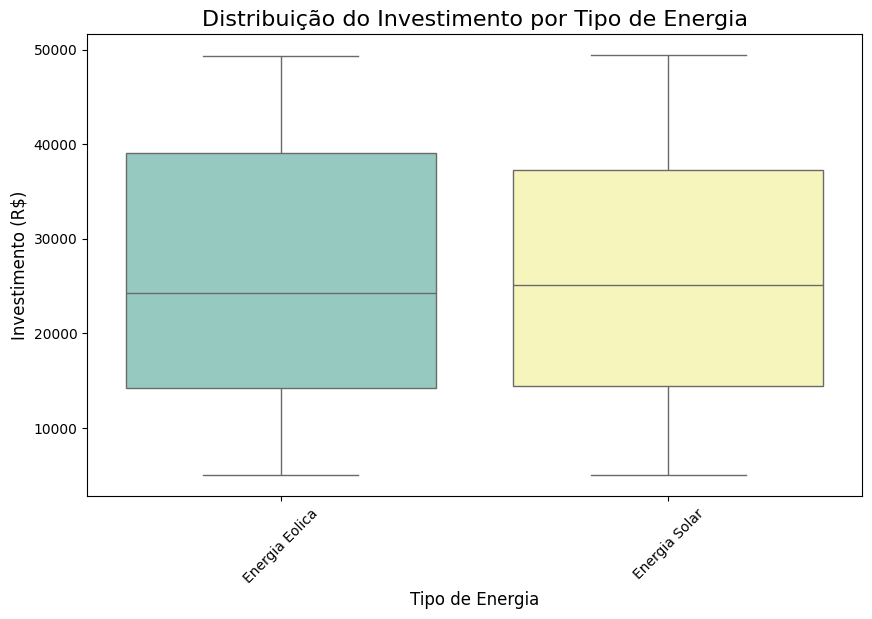

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x="Tipo_Energia", y="Investimento", palette="Set3")
plt.title("Distribuição do Investimento por Tipo de Energia", fontsize=16)
plt.xlabel("Tipo de Energia", fontsize=12)
plt.ylabel("Investimento (R$)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Conclusão da Análise

### O maior ponto a se citar aqui é que quanto maior o investimento nas energias limpas maior será a redução de CO2 emitido.
### Assim podemos concluir que é uma opção para combater o aumento de C02 atual a instalação e o incentivo das energias limpas.

## Após a análise vamos iniciar o treinamento de uma IA

### Onde será visto, Tipo de energia e a Redução do C02.

### Passo 1

Separação dos dados para classificação

Separação dos dados para regressão

In [11]:
X_classificacao = dataset.drop(columns=['Tipo_Energia', 'Regiao'])
y_classificacao = dataset['Tipo_Energia']


X_regressao = dataset.drop(columns=['Tipo_Energia', 'Reducoes_CO2'])
y_regressao = dataset['Reducoes_CO2']

### Passo 2

 Codifica a variável categórica "Regiao" usando variáveis dummy para regressão

In [12]:
X_regressao = pd.get_dummies(X_regressao, columns=['Regiao'], dtype=int)

### Passo 3

Divide os dados em conjuntos de treinamento e teste para classificação e regressão

In [13]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classificacao, y_classificacao, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regressao, y_regressao, test_size=0.2, random_state=42)

### Passo 4

Normalização dos dados para classificação usando StandardScaler

In [14]:
scaler_class = StandardScaler()
X_train_scaled_reg = scaler_class.fit_transform(X_train_class)
X_test_scaled_reg = scaler_class.transform(X_test_class)

### Passo 5

Importação do modelo de classificação SVC

Avaliação do modelo de classificação

In [15]:
from sklearn.svm import SVC
 
modelo_classificacao = SVC(random_state=42)
modelo_classificacao.fit(X_train_scaled_reg, y_train_class)

y_pred_class = modelo_classificacao.predict(X_test_scaled_reg)
print("\nRelatório de Classificação:")
print(classification_report(y_test_class, y_pred_class))
print(f"Acurácia: {accuracy_score(y_test_class, y_pred_class)}")


Relatório de Classificação:
                precision    recall  f1-score   support

Energia Eolica       0.44      0.44      0.44        25
 Energia Solar       0.60      0.60      0.60        35

      accuracy                           0.53        60
     macro avg       0.52      0.52      0.52        60
  weighted avg       0.53      0.53      0.53        60

Acurácia: 0.5333333333333333


### Passo 6

Inicialização e treinamento do modelo de regressão

Aplica o escalonamento (normalização) aos dados de treino e teste usando o StandardScaler.

O modelo de regressão linear é treinado usando os dados escalonados de treino.

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train_scaled_reg, y_train_reg)


LinearRegression()

### Passo 8

Avaliação do modelo de regressão

Calcula o score (R²) do modelo de regressão, que mede a qualidade do ajuste ao conjunto de teste.

In [17]:
score_reg = modelo_regressao.score(X_test_scaled_reg, y_test_reg)
score_reg

-0.1184717224203633

### Passo 9

Salvamento dos modelos e escaladores

Salva os modelos de classificação e regressão, bem como os escaladores associados, 
para que possam ser carregados e utilizados posteriormente para predições com novos dados.

In [18]:
joblib.dump(modelo_classificacao, 'modelo_classificacao.pkl')
joblib.dump(modelo_regressao, 'modelo_regressao.pkl')
joblib.dump(scaler_class, 'scaler_class.pkl')
joblib.dump(scaler_reg, 'scaler_reg.pkl')

['scaler_reg.pkl']

### Passo 10

Este código tem como objetivo realizar a predição do tipo de energia de um novo projeto de energia, baseado em diversas variáveis fornecidas. O fluxo do código pode ser dividido nas seguintes etapas principais:

Preparação dos dados de entrada, Transformação das variáveis categóricas, Alinhamento das colunas, Normalização dos dados, Predição, Exibição do resultado.

Esse código usa um modelo de classificação para prever o tipo de energia de um projeto com base em informações como consumo, investimento, área da instalação, taxa de adoção de energia eólica, entre outras variáveis. Ele prepara os dados de entrada, faz as transformações necessárias, normaliza e então aplica o modelo para gerar a predição.

In [19]:
nova_entrada = {
    'Qual a região de implementação do projeto de energia?': 'Sudeste',
    'Qual o consumo de energia na região?': '1160',
    'Qual o tipo de energia utilizado no projeto?': 'Energia Eolica',
    'Qual o investimento inicial para o projeto?': '34926',
    'Qual a área da instalação em metros quadrados?': '473',
    'Há incentivo do governo para o projeto?': '1',
    'Qual a taxa de adoção de energia eólica?': '93',
    'Qual o tempo médio de instalação do projeto?': '7',
    'Qual o custo de manutenção anual do projeto?': '1777',
    'Quantas famílias são atendidas pelo projeto?': '1',
    'Qual a redução de CO2 gerada pelo projeto?': '',
    'Qual a vida útil do projeto?': '16',
    'Quantos dias de sol há por ano na região?': '346',
    'Qual a velocidade média do vento na região?': '9'
}

nova_entrada_df = pd.DataFrame([nova_entrada])
 

# Selecionar apenas as colunas relevantes para classificação (excluindo as categóricas que precisam de transformação)
colunas_classificacao = [
    'Qual o consumo de energia na região?',
    'Qual o investimento inicial para o projeto?',
    'Qual a área da instalação em metros quadrados?',
    'Há incentivo do governo para o projeto?',
    'Qual a taxa de adoção de energia eólica?',
    'Qual o tempo médio de instalação do projeto?',
    'Qual o custo de manutenção anual do projeto?',
    'Quantas famílias são atendidas pelo projeto?',
    'Qual a vida útil do projeto?',
    'Quantos dias de sol há por ano na região?',
    'Qual a velocidade média do vento na região?',
]

# Adicionar a codificação para 'Regiao', caso tenha sido usada no treinamento
X_nova_classificacao = nova_entrada_df.copy()
X_nova_classificacao = pd.get_dummies(X_nova_classificacao, columns=['Qual a região de implementação do projeto de energia?'], dtype=int)

# Garantir que as colunas estão alinhadas com o conjunto de treinamento
faltando = set(scaler_class.feature_names_in_) - set(X_nova_classificacao.columns)
for col in faltando:
    X_nova_classificacao[col] = 0  # Preencher as colunas ausentes com 0

# Reordenar as colunas para corresponder ao treinamento
X_nova_classificacao = X_nova_classificacao[scaler_class.feature_names_in_]

# Normalizar os dados usando o escalador salvo
X_nova_classificacao_scaled = scaler_class.transform(X_nova_classificacao)

# Fazer a predição
predicao_classificacao = modelo_classificacao.predict(X_nova_classificacao_scaled)

print(f"Predição do tipo de energia: {predicao_classificacao[0]}")


Predição do tipo de energia: Energia Solar


### Passo 11

Este código tem como objetivo realizar a predição de uma variável contínua (redução de CO2) de um novo projeto de energia, com base em diversas variáveis fornecidas. O fluxo do código pode ser descrito nas etapas abaixo:

Carregamento dos modelos e escaladores salvos, Definição dos dados da nova entrada, Conversão dos dados em DataFrame, Codificação da variável categórica 'Região', Alinhamento das colunas de entrada com o conjunto de treinamento, Reordenamento das colunas, Normalização dos dados de entrada, Predição, Exibição do resultado.

Esse código usa um modelo de regressão para prever a redução de CO2 de um projeto de energia com base em diversas características do projeto, como consumo, investimento, área da instalação, taxa de adoção de energia eólica, e outras variáveis. Ele prepara os dados de entrada (transformando variáveis categóricas, normalizando os dados e alinhando as colunas), aplica o modelo treinado e exibe a predição da redução de CO2 gerada pelo projeto.

In [20]:
# Carregar o modelo de regressão e o escalador salvos
modelo_regressao = joblib.load('modelo_regressao.pkl')
scaler_reg = joblib.load('scaler_reg.pkl')

# Dados da nova entrada
nova_entrada_regressao = {
    'Qual a região de implementação do projeto de energia?': 'Sudeste',
    'Qual o consumo de energia na região?': 1160,
    'Qual o investimento inicial para o projeto?': 1000,
    'Qual a área da instalação em metros quadrados?': 473,
    'Há incentivo do governo para o projeto?': 1,
    'Qual a taxa de adoção de energia eólica?': 93,
    'Qual o tempo médio de instalação do projeto?': 7,
    'Qual o custo de manutenção anual do projeto?': 2000,
    'Quantas famílias são atendidas pelo projeto?': 1,
    'Qual a vida útil do projeto?': 16,
    'Quantos dias de sol há por ano na região?': 346,
    'Qual a velocidade média do vento na região?': 9
}

# Converter para DataFrame
nova_entrada_regressao_df = pd.DataFrame([nova_entrada_regressao])

# Preparar os dados de entrada para regressão
# Codificar 'Regiao' como dummies
X_nova_regressao = pd.get_dummies(nova_entrada_regressao_df, columns=['Qual a região de implementação do projeto de energia?'], dtype=int)

# Garantir que as colunas estão alinhadas com o conjunto de treinamento
faltando = set(scaler_reg.feature_names_in_) - set(X_nova_regressao.columns)
for col in faltando:
    X_nova_regressao[col] = 0  # Preencher as colunas ausentes com 0

# Reordenar as colunas para corresponder ao treinamento
X_nova_regressao = X_nova_regressao[scaler_reg.feature_names_in_]

# Normalizar os dados usando o escalador salvo
X_nova_regressao_scaled = scaler_reg.transform(X_nova_regressao)

# Fazer a predição
predicao_regressao = modelo_regressao.predict(X_nova_regressao_scaled)

print(f"Predição da redução de CO2: {predicao_regressao[0]}")


Predição da redução de CO2: 475.1840637721416
